In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


Import libraris 

In [2]:
# install data from library
from ucimlrepo import fetch_ucirepo

#import matplot 
import matplotlib.pyplot as plt

# import train test split

from sklearn.model_selection import train_test_split

import pandas as pd
#import gussian model

from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import (accuracy_score , 
  f1_score , confusion_matrix, ConfusionMatrixDisplay , classification_report)


import numpy as np

In [3]:
# call data
spambase = fetch_ucirepo(id=94)


In [4]:
# select the feature and target

X = spambase.data.features
y = spambase.data.targets



Exploratory Data Analysis

In [5]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)
print(X.isnull().sum())
print(y.isnull().sum())

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Feature Selection

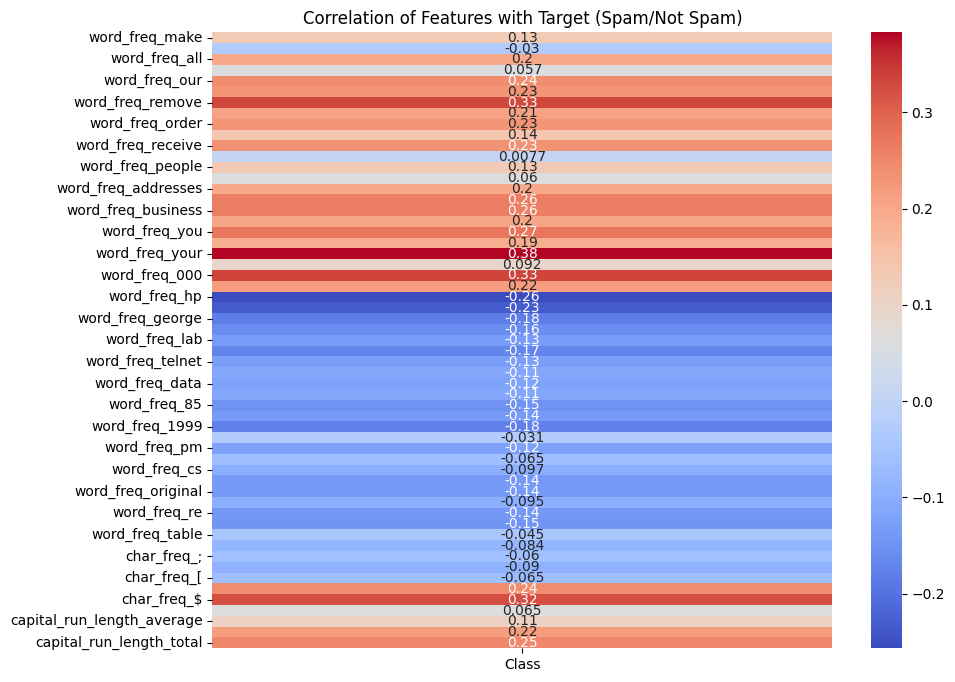

In [6]:
data = pd.concat([X,y] , axis = 1)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()

target_corr = correlation_matrix['Class'].drop('Class')

plt.figure(figsize=(10, 8))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation of Features with Target (Spam/Not Spam)')
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd



model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# use SelectFromModel function
sfm = SelectFromModel(model, threshold=0.01)
sfm.fit(X, y)
# extract important feautres
X_important = sfm.transform(X)

selected_features = X.columns[sfm.get_support()]
# new columns
X_important_df = pd.DataFrame(X_important, columns=selected_features)

print(f'the original features: {X.shape[1]}')
print(f'the featurse are selected : {X_important.shape[1]}')
print('features :', selected_features.tolist())




/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


the original features: 57
the featurse are selected : 24
features : ['word_freq_all', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_will', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_your', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_1999', 'word_freq_edu', 'char_freq_(', 'char_freq_!', 'char_freq_$', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']


In [8]:
X = X_important_df

X

,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_will,word_freq_free,word_freq_business,word_freq_email,word_freq_you,...,word_freq_hpl,word_freq_george,word_freq_1999,word_freq_edu,char_freq_(,char_freq_!,char_freq_$,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.64,0.32,0.00,0.00,0.00,0.64,0.32,0.00,1.29,1.93,...,0.0,0.0,0.00,0.00,0.000,0.778,0.000,3.756,61.0,278.0
1,0.50,0.14,0.28,0.21,0.07,0.79,0.14,0.07,0.28,3.47,...,0.0,0.0,0.07,0.00,0.132,0.372,0.180,5.114,101.0,1028.0
2,0.71,1.23,0.19,0.19,0.12,0.45,0.06,0.06,1.03,1.36,...,0.0,0.0,0.00,0.06,0.143,0.276,0.184,9.821,485.0,2259.0
3,0.00,0.63,0.00,0.31,0.63,0.31,0.31,0.00,0.00,3.18,...,0.0,0.0,0.00,0.00,0.137,0.137,0.000,3.537,40.0,191.0
4,0.00,0.63,0.00,0.31,0.63,0.31,0.31,0.00,0.00,3.18,...,0.0,0.0,0.00,0.00,0.135,0.135,0.000,3.537,40.0,191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.62,0.00,0.31,0.00,0.00,1.88,0.00,0.00,0.00,0.62,...,0.0,0.0,0.00,0.31,0.232,0.000,0.000,1.142,3.0,88.0
4597,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,...,0.0,0.0,0.00,2.00,0.000,0.353,0.000,1.555,4.0,14.0
4598,0.30,0.00,0.00,0.00,0.00,1.80,0.00,0.00,0.90,1.50,...,0.0,0.0,0.00,1.20,0.718,0.000,0.000,1.404,6.0,118.0
4599,0.00,0.32,0.00,0.00,0.00,0.32,0.00,0.00,0.00,1.93,...,0.0,0.0,0.00,0.32,0.057,0.000,0.000,1.147,5.0,78.0


In [9]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_all               4601 non-null   float64
 1   word_freq_our               4601 non-null   float64
 2   word_freq_over              4601 non-null   float64
 3   word_freq_remove            4601 non-null   float64
 4   word_freq_internet          4601 non-null   float64
 5   word_freq_will              4601 non-null   float64
 6   word_freq_free              4601 non-null   float64
 7   word_freq_business          4601 non-null   float64
 8   word_freq_email             4601 non-null   float64
 9   word_freq_you               4601 non-null   float64
 10  word_freq_your              4601 non-null   float64
 11  word_freq_000               4601 non-null   float64
 12  word_freq_money             4601 non-null   float64
 13  word_freq_hp                4601 

In [10]:
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


In [11]:
# train test and split

X_train, X_test , y_train,y_test = train_test_split(X,y , test_size=0.20,random_state=40)

In [12]:
# build the model 
modelNB  = GaussianNB()

# train the model 

modelNB.fit(X_train,y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [13]:
y_pred= modelNB.predict(X_test)



In [14]:
# the predicted values
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [15]:
#actual values

y_test

,Class
3357,0
4091,0
2653,0
3778,0
3052,0
...,...
1759,1
359,1
1928,0
3405,0


In [16]:
accuracy = accuracy_score(y_pred, y_test)

f1 = f1_score(y_pred,y_test, average="weighted")

In [17]:
print("accuracy :" , accuracy)



accuracy : 0.9044516829533116


In [18]:
print("f1 score :" , f1)

f1 score : 0.9045050504035225


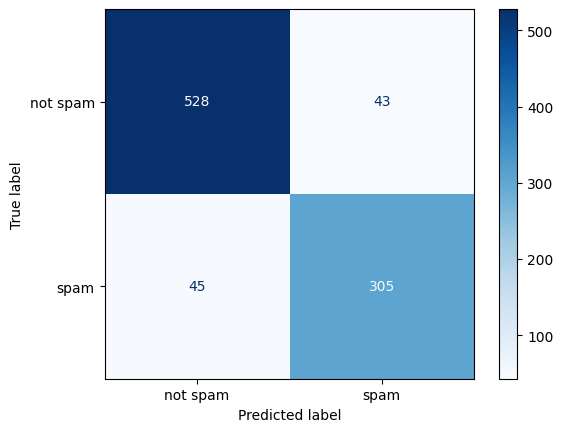

In [19]:
#confusion matrix


cm = confusion_matrix(y_test, y_pred)

lables = ["not spam" , "spam"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lables)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [20]:
y_numeric = np.ravel(y) 


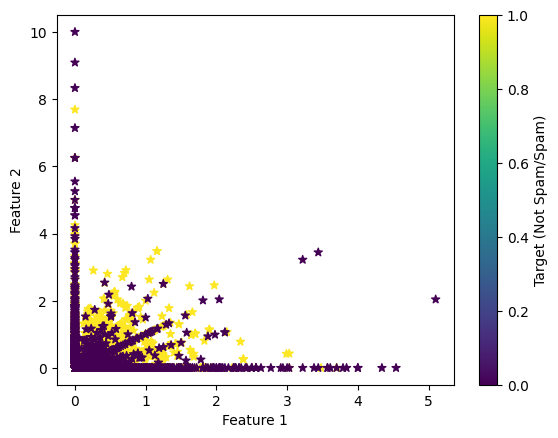

In [21]:

plt.scatter(X.iloc[: ,0] , X.iloc[:,1], c=y_numeric , marker = '*')
plt.colorbar(label='Target (Not Spam/Spam)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
